In [2]:
import tweepy
import pickle
import os.path

# Twitter API

In [45]:
#Twitter API key
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

In [46]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

Twitter API has restrictions
- GET: 15 calls per 15 min

#  get retweeters

In [47]:
def get_retweeters(api, tweet_id, pickle_path):
    if os.path.exists(pickle_path):
        with open(pickle_path, 'rb') as f:
            retweeters = pickle.load(f)
    else:
        retweeters = api.retweeters(tweet_id)
        with open(pickle_path, 'wb') as f:
            pickle.dump(retweeters, f)
    return retweeters
    
def get_retweeters_details(api, retweeters, pickle_path):
    """retweeters up to 100"""
    friends = {}
    followers = {}

    if os.path.exists(pickle_path):
        with open(pickle_path, 'rb') as f:
            retweeters_details = pickle.load(f)
    else:
        retweeters_details = api.statuses_lookup(retweeters)  
        with open(pickle_path, 'wb') as f:
            pickle.dump(retweeters_details, f)
    return retweeters_details

In [48]:
tweet_id = '1134738254496800769'  # tweet id of roy29fuku
retweeters = get_retweeters(api, tweet_id, 'data/retweeters.pickle')
retweeters_details = get_retweeters_details(api, retweeters, 'data/retweeters_details.pickle')

---


---

# get friends and followers

In [49]:
def get_friends_and_details(api, user_id):
    friends_details = api.friends(user_id)
    friends = [f.id for f in friends_details]
    return follows, follows_details

def get_followers_and_details(api, user_id):
    followers_details = api.followers(user_id)
    followers = [f.id for f in followers_details]
    return followers, followers_details

In [59]:
src_user_id = '715433541375373312'  # user id of roy29fuku
friends, friends_details =get_friends_and_details(api, src_user_id)
followers, followers_details = get_followers_and_details(api, src_user_id)

---

# get follows and followers of retweeters

In [51]:
import time
from tqdm import tqdm

In [54]:
rt_friends = {}
rt_followers = {}

friends_pickle_path = 'data/rt_friends.pickle'
if os.path.exists(friends_pickle_path):
    with open(friends_pickle_path, 'rb') as f:
        rt_friends = pickle.load(f)
        has_friends_pickle = True
else:
        has_friends_pickle = False
    
followers_pickle_path = 'data/rt_followers.pickle'
if os.path.exists(followers_pickle_path):
    with open(followers_pickle_path, 'rb') as f:
        rt_followers = pickle.load(f)
        has_followers_pickle = True
else:
        has_followers_pickle = False

# Twitter API has rate limiting (15 calls per 15 min)
sleep_sec = 75
if not (has_friends_pickle and has_followers_pickle):
    for user_id in tqdm(retweeters):
        if not has_friends_pickle:
            rt_friends[user_id] = api.friends(user_id)
            time.sleep(sleep_sec)
        if not has_followers_pickle:
            rt_followers[user_id] = api.followers(user_id)
            time.sleep(sleep_sec)
            
if not has_friends_pickle:
    with open(friends_pickle_path, 'wb') as f:
        pickle.dump(friends, f)
    
if not has_followers_pickle:
    with open(followers_pickle_path, 'wb') as f:
        pickle.dump(followers, f)


In [55]:
len(friends) + len(followers)

40

---

# create a graph 
connect nodes

In [73]:
from tweepy.models import User
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline


In [57]:
class Follow:
    def __init__(self, followee: User, follower: User):
        self.followee = followee
        self.follower = follower
        
class Network:
    def __init__(self, nodes, edges):
        self.nodes = nodes
        self.edges = edges
        self.graph = create_network(nodes, edges)
    
def create_network(node, edges):
    graph = nx.DiGraph()
    graph.add_nodes_from(nodes)
    graph.add_edges_from(edges)
    return graph
        
#     def get_descriptions(self):
#         descriptions = [n.description for  n in self.nodes]
#         return descriptions


In [70]:
nodes = []
edges = []

nodes.append(src_user_id)
for friend in friends:
    nodes.append(friend)
    edges.append((src_user_id, friend))
for follower in followers:
    nodes.append(follower)
    edges.append((follower, src_user_id))

for user_id in retweeters:
    nodes.append(user_id)
    for rt_friend in rt_friends[user_id]:
        nodes.append(rt_friend.id)
        edges.append((user_id, rt_friend.id))
    for rt_follower in rt_followers[user_id]:
        nodes.append(rt_follower.id)
        edges.append((rt_follower.id, user_id))
nodes = list(set(nodes))
edges = list(set(edges))

In [71]:
print(len(nodes))
print(len(edges))

2717
3302


In [61]:
network = Network([1,2,3], [[1,2],[2,3]])

NameError: name 'plt' is not defined

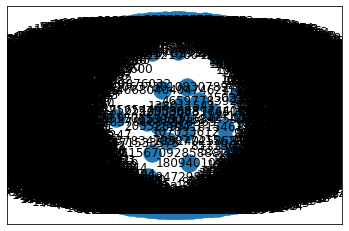

In [19]:

nx.draw_networkx(network.graph)
plt.show()

In [18]:
network.graph

# visualize

In [84]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

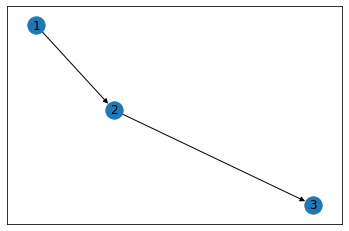

In [75]:
# Be careful of the size of  nodes and edges.
G = nx.DiGraph()

G.add_nodes_from([1,2,3])
G.add_edges_from([[1, 2], [2, 3]])
    
nx.draw_networkx(G)
plt.show()

# references
- [Twitter API](https://developer.twitter.com/en/docs/accounts-and-users/follow-search-get-users/api-reference/get-friends-ids)
- [NetworkX](https://networkx.github.io/documentation/stable/tutorial.html)
- [tweepy](https://github.com/tweepy/tweepy)
- [twitter-graph](https://github.com/lgallen/twitter-graph)
